## Abstract:
In this notebook, we are going to dive into the world of game recommendations on Steam, the largest digital distribution platform for PC gaming. The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques of python's matplotlib and seaborn library to answer below questions about the dataset

* Which independent variables are useful to predict a target (dependent variable)?
* Which independent variables have missing data? How much
* Do the training and test sets have the same data?
* In the predictor variables independent of all the other predictor variables?
* Which predictor variables are the most important?
* Do the ranges of the predictor variables make sense?
* What are the distributions of the predictor variables?

Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that three independent variables are significant, these results can be used to further optimize the model for predicting steam engine's recommendation and give better predictions

In [1]:
# @title Kaggle Environment for Colab
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-recommendations-on-steam/games_metadata.json
/kaggle/input/game-recommendations-on-steam/users.csv
/kaggle/input/game-recommendations-on-steam/games.csv
/kaggle/input/game-recommendations-on-steam/recommendations.csv


In [2]:
games_dir = "/kaggle/input/game-recommendations-on-steam/games.csv"
users_dir = "/kaggle/input/game-recommendations-on-steam/users.csv"
recommendations_dir = "/kaggle/input/game-recommendations-on-steam/recommendations.csv"
metadata_dir = "/kaggle/input/game-recommendations-on-steam/games_metadata.json"


games_df = pd.read_csv(games_dir)
users_df = pd.read_csv(users_dir)
recommendations_df = pd.read_csv(recommendations_dir)
metadata_df = pd.read_json(metadata_dir, lines=True)

In [3]:
for col in recommendations_df.columns:
  if recommendations_df[col].dtype == 'float64':
      recommendations_df[col] = recommendations_df[col].astype('float32')
  if recommendations_df[col].dtype == 'int64':
      recommendations_df[col] = recommendations_df[col].astype('int32')

In [4]:
games_df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


In [5]:
users_df.describe()

,user_id,products,reviews
count,1.430606e+07,1.430606e+07,1.430606e+07
mean,7.153032e+06,1.163734e+02,2.876738e+00
std,4.129805e+06,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.576516e+06,2.300000e+01,1.000000e+00
50%,7.153032e+06,5.500000e+01,1.000000e+00
75%,1.072955e+07,1.270000e+02,3.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


In [6]:
recommendations_df.describe()

,app_id,helpful,funny,hours,user_id,review_id
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,6.032724e+05,3.202567e+00,1.058071e+00,1.006022e+02,7.450576e+06,2.057740e+07
std,4.729233e+05,4.693649e+01,2.867060e+01,1.761675e+02,4.010685e+06,1.188037e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.539400e+05,0.000000e+00,0.000000e+00,7.800000e+00,4.287256e+06,1.028870e+07
50%,4.351500e+05,0.000000e+00,0.000000e+00,2.730000e+01,7.546446e+06,2.057740e+07
75%,9.331100e+05,0.000000e+00,0.000000e+00,9.920000e+01,1.096877e+07,3.086609e+07
max,2.253290e+06,3.621200e+04,2.810900e+04,1.000000e+03,1.430606e+07,4.115479e+07


In [7]:
games_df.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [8]:
games_df.dtypes

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object

In [9]:
users_df.isna().sum()

user_id     0
products    0
reviews     0
dtype: int64

In [10]:
users_df.dtypes

user_id     int64
products    int64
reviews     int64
dtype: object

In [11]:
recommendations_df.isna().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [12]:
recommendations_df.dtypes

app_id              int32
helpful             int32
funny               int32
date               object
is_recommended       bool
hours             float32
user_id             int32
review_id           int32
dtype: object

In [13]:
games_df.drop('date_release', axis=1, inplace=True)
recommendations_df.drop('date', axis=1, inplace=True)

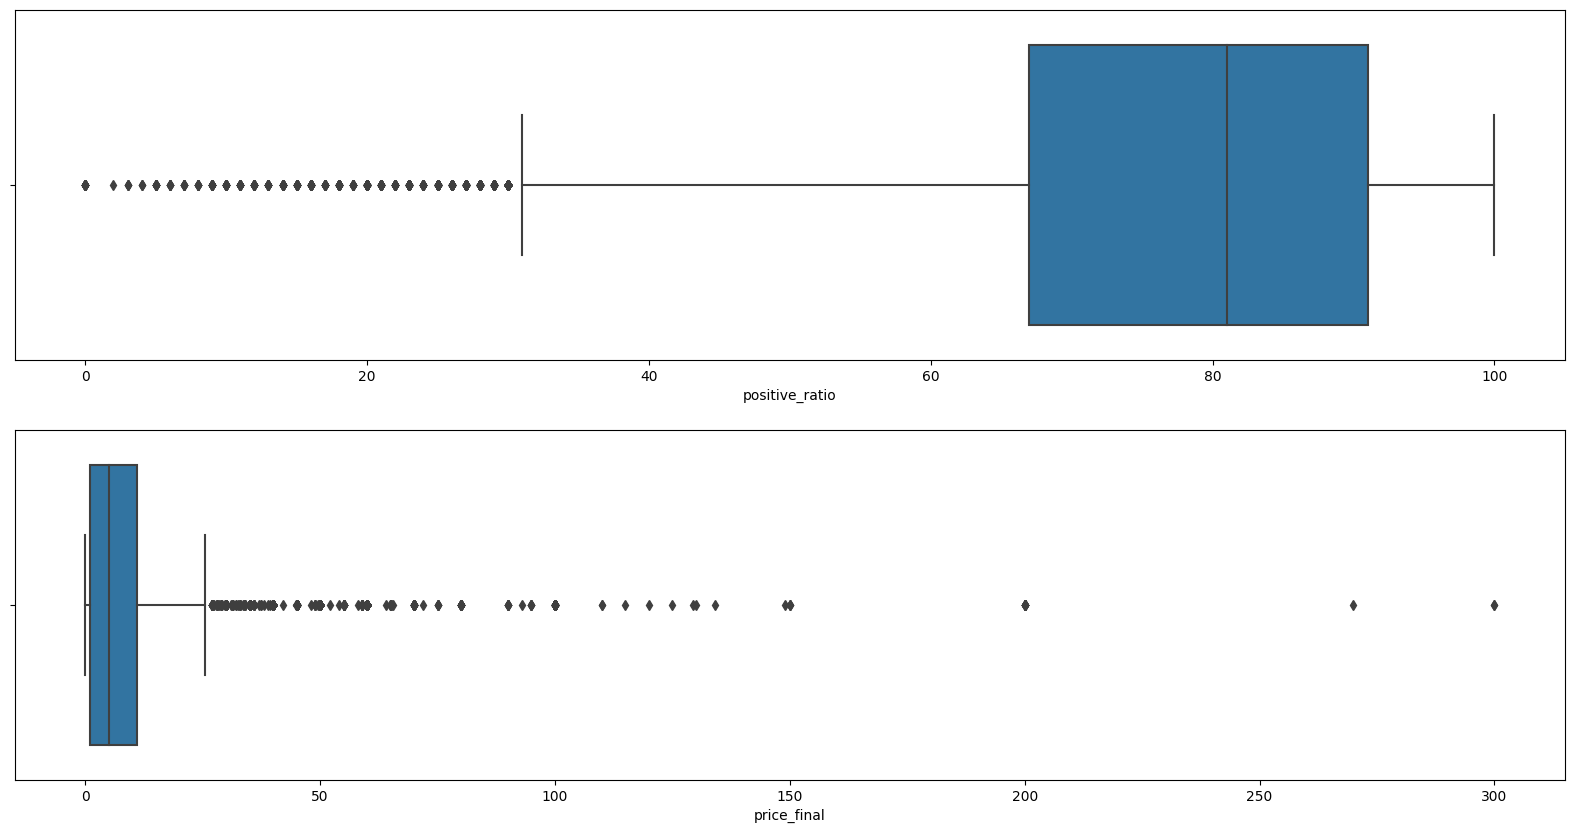

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(games_df, x='positive_ratio', ax=axes[0])
sns.boxplot(games_df, x='price_final', ax=axes[1])
plt.show()

In [15]:
# sns.boxplot(recommendations_df['hours'].T)

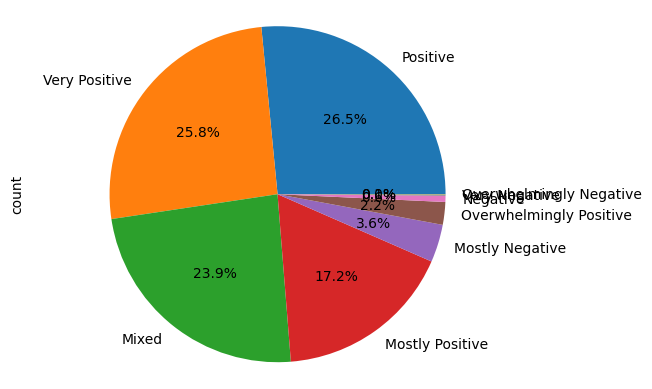

In [16]:
count_ratings = games_df['rating'].value_counts()

count_ratings.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

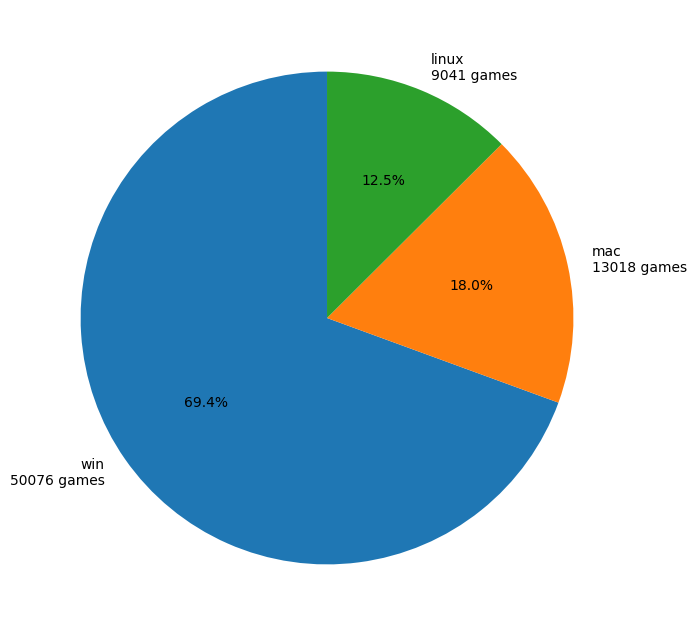

In [17]:
platform_counts = games_df[['win', 'mac', 'linux']].sum()
platforms = platform_counts.index

plt.figure(figsize=(8, 8))
_, labels, autopct = plt.pie(platform_counts, labels=platforms, autopct=lambda p: f'{p:.1f}%' ,startangle=90)

cantidades = [f'{c} games' for c in platform_counts]

for i, label in enumerate(labels):
    label.set_text(f'{platforms[i]}\n{cantidades[i]}')

plt.show()

In [18]:
merge_recommendation = recommendations_df[['is_recommended', 'app_id', 'hours']]

In [19]:
merged_df = pd.merge(merge_recommendation, games_df, on='app_id', how='inner')

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   is_recommended  bool   
 1   app_id          int32  
 2   hours           float32
 3   title           object 
 4   win             bool   
 5   mac             bool   
 6   linux           bool   
 7   rating          object 
 8   positive_ratio  int64  
 9   user_reviews    int64  
 10  price_final     float64
 11  price_original  float64
 12  discount        float64
 13  steam_deck      bool   
dtypes: bool(5), float32(1), float64(3), int32(1), int64(2), object(2)
memory usage: 2.6+ GB


In [21]:
ratings_map = {
    "Overwhelmingly Positive" : 9,
    "Mostly Positive" : 8,
    "Very Positive" : 7,
    "Positive" : 6,
    "Mixed" : 5,
    "Negative" : 4,
    "Very Negative" : 3,
    "Mostly Negative" : 2,
    "Overwhelmingly Negative" : 1
}


In [22]:
merged_df['rating'] = merged_df['rating'].map(ratings_map)

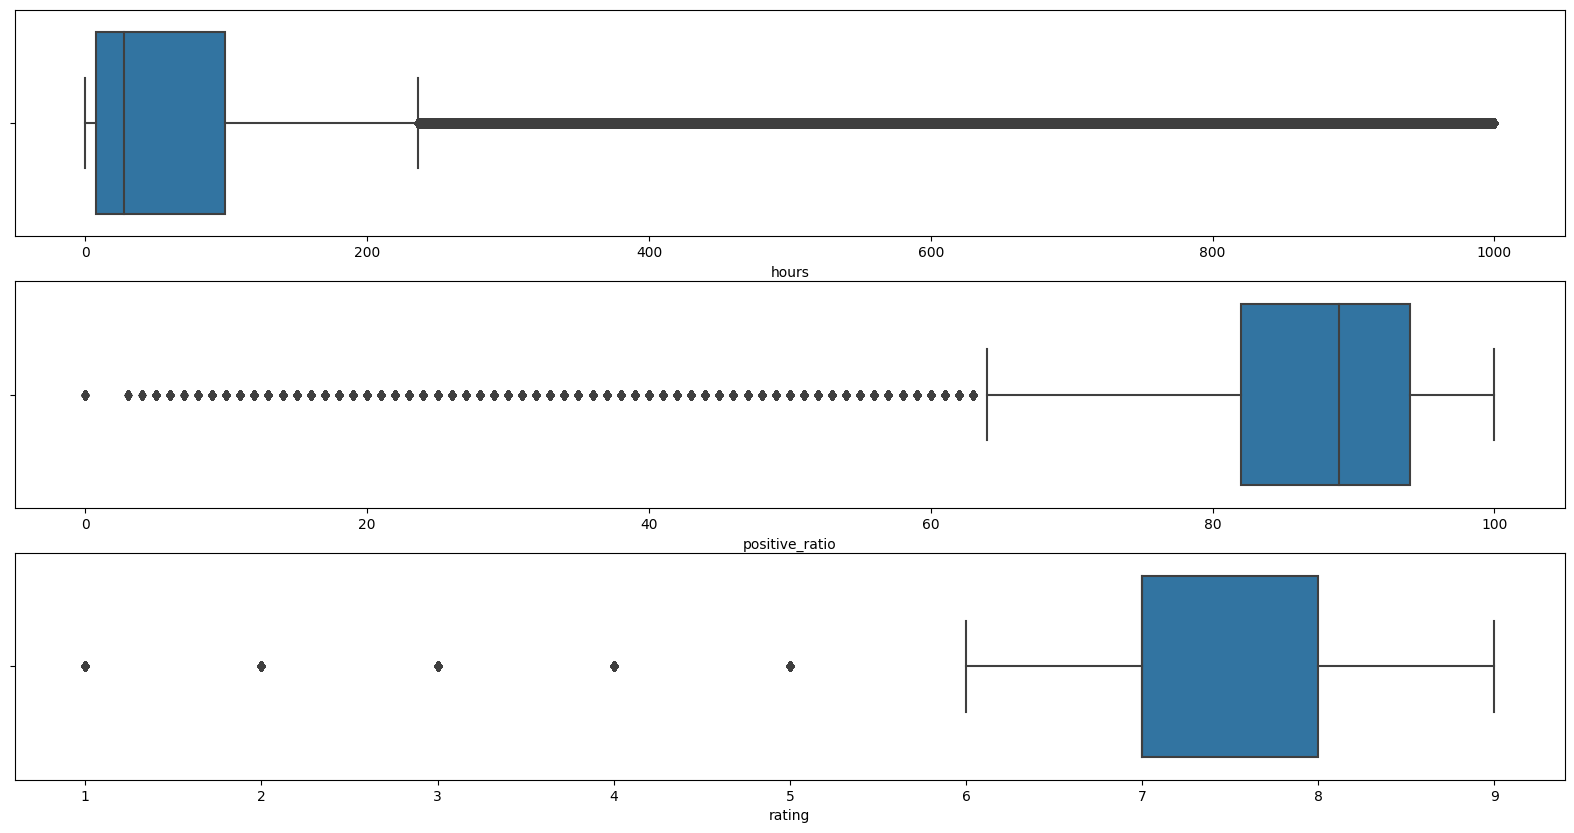

In [23]:
f, axes = plt.subplots(3, 1, figsize=(20, 10))

sns.boxplot(merged_df, x='hours', ax=axes[0])
sns.boxplot(merged_df, x='positive_ratio', ax=axes[1])
sns.boxplot(merged_df, x='rating', ax=axes[2])
plt.show()

In [24]:
merged_df['win'] = merged_df['win'].astype(int)
merged_df['mac'] = merged_df['mac'].astype(int)
merged_df['linux'] = merged_df['linux'].astype(int)

In [25]:
merged_df.columns

Index(['is_recommended', 'app_id', 'hours', 'title', 'win', 'mac', 'linux',
       'rating', 'positive_ratio', 'user_reviews', 'price_final',
       'price_original', 'discount', 'steam_deck'],
      dtype='object')

In [26]:
merged_df.size

576167116

<Axes: >

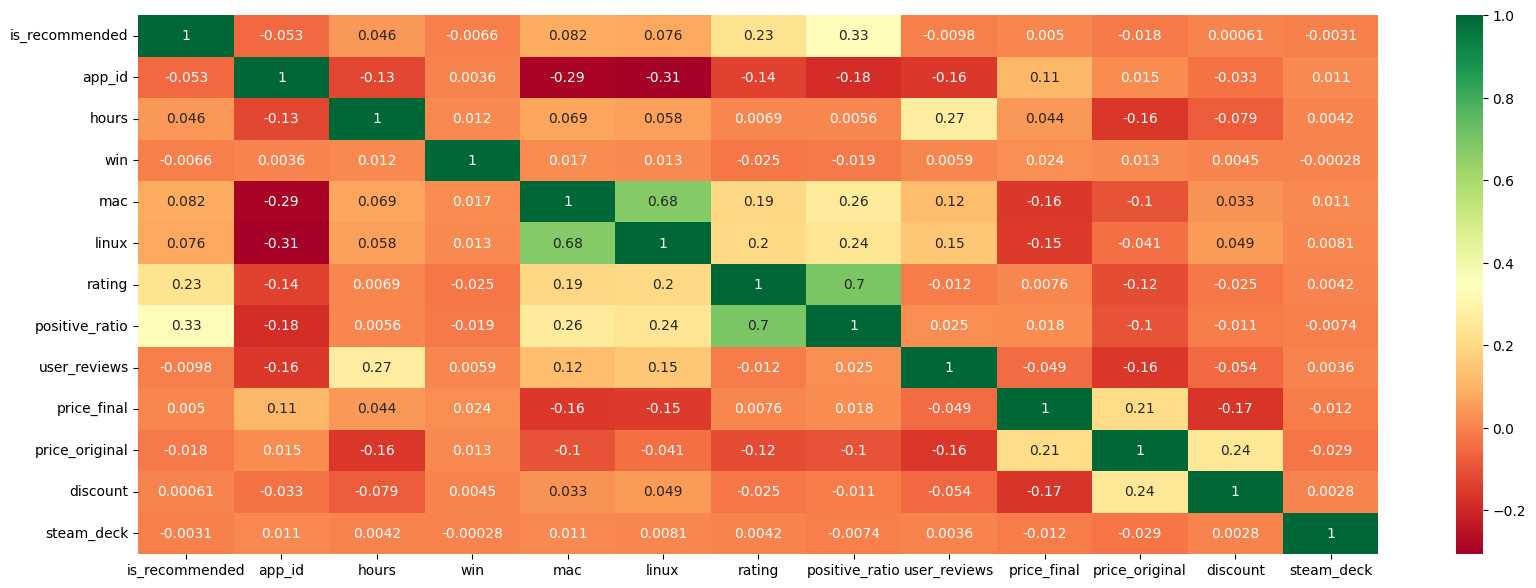

In [27]:
correlation_matrix = merged_df.drop('title', axis=1).corr()

plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")

In [28]:
target_variable = ['is_recommended']

In [29]:
features = correlation_matrix[target_variable][correlation_matrix['is_recommended'] > 0.1].index.to_list()
features.remove('is_recommended')
features

['rating', 'positive_ratio']

In [40]:
#Huge data - hundread million
thresholded_data = merged_df[:50000]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = thresholded_data[features]
y = thresholded_data[target_variable]

In [32]:
X.corr()

,rating,positive_ratio
rating,1.000000,0.665675
positive_ratio,0.665675,1.000000


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/tmp/ipykernel_330/856936266.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.85
Confusion Matrix:
[[  22 1502]
 [  27 8449]]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


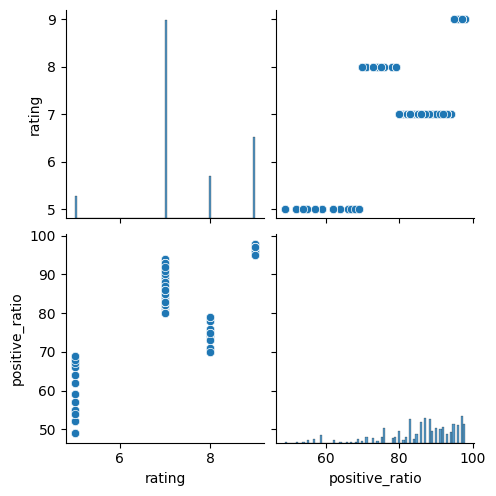

In [35]:
sns.pairplot(X)

In [41]:
from sklearn.feature_selection import RFE

y = thresholded_data.pop('is_recommended')
thresholded_data.drop('title', axis=1, inplace=True)
X = thresholded_data

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

/tmp/ipykernel_330/2096819921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thresholded_data.drop('title', axis=1, inplace=True)


RFE(estimator=RandomForestClassifier(), n_features_to_select=3)

In [42]:
relevant_variables_rfe = X.columns[rfe.support_]
relevant_variables_rfe

Index(['app_id', 'hours', 'positive_ratio'], dtype='object')

In [43]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
feature_importances = model_rf.feature_importances_
relevant_variables_rf = X.columns[feature_importances.argsort()[::-1][:3]]
relevant_variables_rf

Index(['hours', 'positive_ratio', 'rating'], dtype='object')

In [44]:
features = relevant_variables_rfe.tolist()
features

['app_id', 'hours', 'positive_ratio']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=69)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### For categorical data, calculate the accuracy and a confusion matrix.

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.79
Confusion Matrix:
[[ 430 1094]
 [ 987 7489]]


In [56]:
features = relevant_variables_rf.tolist()
features

['hours', 'positive_ratio', 'rating']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=69)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.80
Confusion Matrix:
[[ 427 1097]
 [ 941 7535]]


### Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [48]:
import pandas as pd
from scipy.stats import zscore

X = merged_df[:50000]
print("Data with outliers:", X.size)
z_scores = zscore(X[relevant_variables_rf])

threshold = 3

outliers_mask = (abs(z_scores) > threshold).any(axis=1)

Xdf_without_outliers = X.drop(X[outliers_mask].index)

print("Data without outliers:",Xdf_without_outliers.size)

Data with outliers: 700000
Data without outliers: 673554


In [49]:
X = Xdf_without_outliers.drop(['is_recommended','title'], axis=1)

In [50]:
y = Xdf_without_outliers[target_variable]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/tmp/ipykernel_330/856936266.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.79
Confusion Matrix:
[[ 397 1056]
 [ 975 7195]]


### Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df = merged_df[:10000].copy()

# Set a random seed for reproducibility
np.random.seed(42)

# Define the percentages to remove
percentages_to_remove = [0.01, 0.05, 0.1]

# Define numeric columns
numeric_columns = ['hours', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck']

# Create a loop to remove data and impute missing values
for percentage in percentages_to_remove:
    # Randomly select indices to remove
    num_rows = int(percentage * len(df))
    indices_to_remove = np.random.choice(df.index, num_rows, replace=False)
    
    # Store the original values before removal
    removed_values = df.loc[indices_to_remove, numeric_columns].copy()
    
    # Remove values
    df.loc[indices_to_remove, numeric_columns] = np.nan
    
    # Impute missing values using mean, median, and k-Nearest Neighbors
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_median = SimpleImputer(strategy='median')

    imputer_knn = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
    df_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(df[numeric_columns]), columns=numeric_columns)
    df_imputed_median = pd.DataFrame(imputer_median.fit_transform(df[numeric_columns]), columns=numeric_columns)
    df_imputed_knn = pd.DataFrame(imputer_knn.fit_transform(df[numeric_columns]), columns=numeric_columns)

    # Combine imputed values with non-numeric columns
    df_imputed_mean = pd.concat([df[['is_recommended']], df_imputed_mean], axis=1)
    df_imputed_median = pd.concat([df[['is_recommended']], df_imputed_median], axis=1)
    df_imputed_knn = pd.concat([df[['is_recommended']], df_imputed_knn], axis=1)
    
    # Evaluate the performance of the imputation methods
    for df_imputed, method in zip([df_imputed_mean, df_imputed_median, df_imputed_knn], ['Mean', 'Median', 'KNN']):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(df_imputed.drop('is_recommended', axis=1), df_imputed['is_recommended'], test_size=0.2, random_state=42)
        
        # Train a logistic regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Evaluate the model on the testing set
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        confusion_mat = confusion_matrix(y_test, predictions)
        
        # Print evaluation metrics
        print(f"Imputation Method: {method}, Missing Percentage: {percentage * 100}%")
        print(f"Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print(confusion_mat)
        print("\n")

    # Restore the removed values for the next iteration
    df.loc[indices_to_remove, numeric_columns] = removed_values

Imputation Method: Mean, Missing Percentage: 1.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: Median, Missing Percentage: 1.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: KNN, Missing Percentage: 1.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: Mean, Missing Percentage: 5.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: Median, Missing Percentage: 5.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: KNN, Missing Percentage: 5.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: Mean, Missing Percentage: 10.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: Median, Missing Percentage: 10.0%
Accuracy: 0.8565
Confusion Matrix:
[[   0  287]
 [   0 1713]]


Imputation Method: KNN, Missing Percentage: 10.0%
Accuracy: 0.8565
Confusion Matri

### What are the data types? (Only numeric and categorical)
    There are 18 numerical columns and 4 categorical columns.

### Are there missing values?
    No there are no missing values in the dataset.

### What are the likely distributions of the numeric variables?
    1. Looking at the Boxplot above, it appears that all independent variables are roughly following normal distribution.
    2. There are few outliers in few of the predictor variables like in hours, positive_ratio and rating.
    
### Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
    1. Correlation Analysis
    2. Recursive Feature Elimination
    3. Feature Importance from Tree based Model

### Which independent variables have missing data? How much? 
    There are no missing values in any of the columns.

### Do the training and test sets have the same data?
    To optimize memory usage due to the large dataset containing over a hundred million records, I'm downsizing the dataset to 50,000 data points for both training and testing. The test set will be constructed with a 20% split from the available data.

### Is the predictor variables independent of all the other predictor variables?
    For many pairs of variables, the correlation coefficients are close to 0, indicating a weak linear relationship.

### Which predictor variables are the most important?
    From the analysis of predicting the independent variable, it is evident that the "positive_ratio" has a significant impact. This conclusion is drawn from the observation that it exhibits a correlation greater than 0.5 with the target variable.

### Do the ranges of the predictor variables make sense?
    hours:
    Interpretation: Higher values indicate more gameplay hours, which intuitively aligns with a potentially higher likelihood of being recommended.

    positive_ratio:
    Interpretation: A higher positive ratio suggests a higher proportion of positive reviews, which makes sense as games with more positive reviews might be more likely to be recommended.
    
    rating:
    Range: 
    Interpretation: Higher ratings are associated with a higher likelihood of being recommended, aligning with the expectation that well-rated games are more likely to be recommended.

### What are the distributions of the predictor variables?
    Hours: Right-skewed, with a median of around 400 hours and a long tail extending to the right. There are a few outliers on the far right of the plot.
    
    Positive ratio: Approximately normally distributed, with a median of around 50 and a few outliers on both sides of the plot.
    
    Rating: Right-skewed, with a median of around 60 and a long tail extending to the right. There are a few outliers on the far right of the plot.

## Conclusion:
    The analysis revealed multicollinearity within the data, but only positive_ratio, hours, and rating emerged as statistically significant predictors.

## References:
Pandas - https://pandas.pydata.org/docs/

NumPy - https://numpy.org/doc/stable/

scikit-learn - https://scikit-learn.org/stable/auto_examples/index.html

@article{scikit-learn,
  title={Scikit-learn: Machine Learning in {P}ython},
  author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
          and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
          and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
          Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
  journal={Journal of Machine Learning Research},
  volume={12},
  pages={2825--2830},
  year={2011}
}


## License:
MIT License

Copyright (c) 2024 Nithish

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
